<a href="https://colab.research.google.com/github/derianr32/tareas_SyS/blob/main/Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Diagrama de Polos y Ceros ---


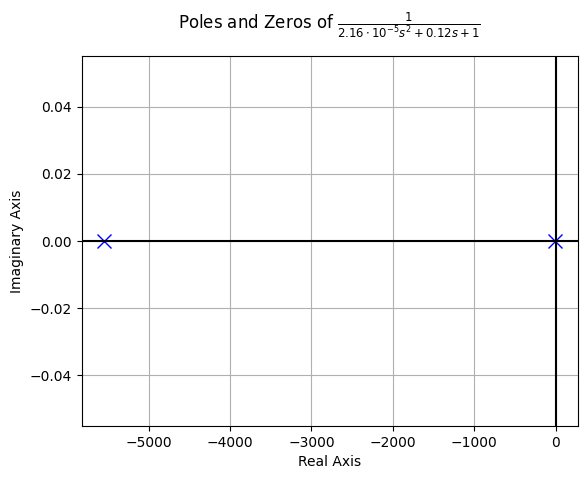


--- Diagrama de Bode ---


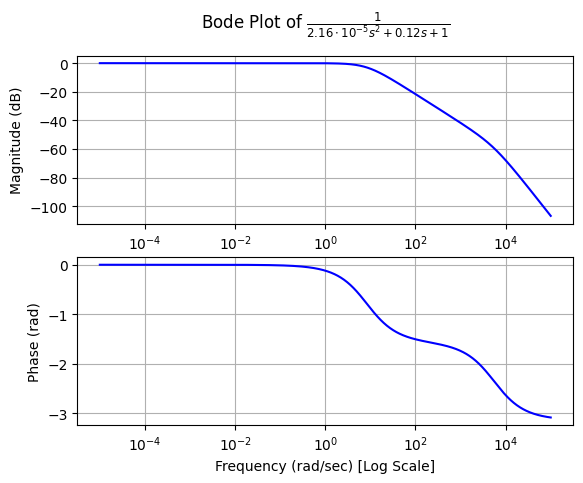


--- Respuesta al Impulso (h(t)) ---


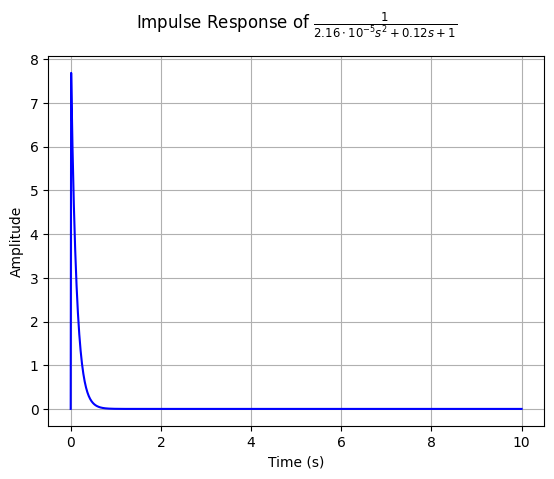


--- Respuesta al Escalón (y(t)) ---


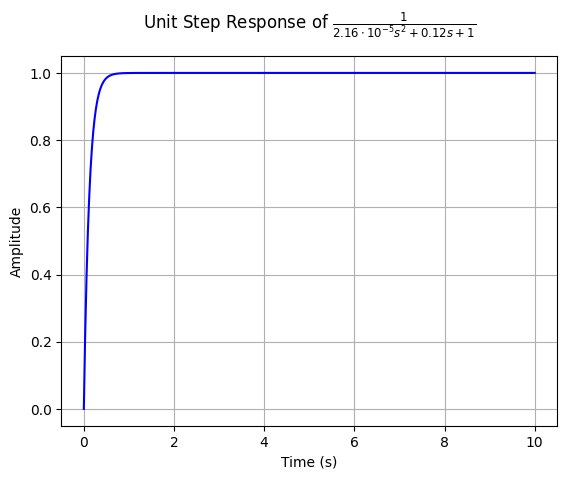

In [6]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)

# --------------------------------------------------------------------------
# PARÁMETROS DEL EJERCICIO ORIGINAL: R = 1kΩ, L = 180mH, C = 120µF
# --------------------------------------------------------------------------
RLC_Ejercicio = {R: 1000, L: 0.180, C: 120e-6}
# Usamos notación científica (e-6) para C

# Definición de la Función de Transferencia H(s) para un filtro pasa-bajos
# H(s) = Vo(s)/Vi(s) = 1 / (LC*s**2 + RC*s + 1)
H=control.TransferFunction(1,L*C*s**2 + R*C*s + 1,s)

# Transferencia Evaluada (HRLC)
HRLC=control.TransferFunction(H.num,H.den.subs(RLC_Ejercicio),s)

# --- 1. Diagrama de Polos y Ceros ---
print("\n--- Diagrama de Polos y Ceros ---")
control.pole_zero_plot(HRLC)
# NOTA: Los polos deberían ser -8.33 y -5547, ambos muy cercanos al eje real.

# --- 2. Diagrama de Bode (Magnitud y Fase) ---
print("\n--- Diagrama de Bode ---")
control.bode_plot(HRLC)
# NOTA: La magnitud debe empezar en 0 dB y caer a partir de 8.33 rad/s.

# --- 3. Respuesta al Impulso (h(t)) ---
print("\n--- Respuesta al Impulso (h(t)) ---")
control.impulse_response_plot(HRLC, T_end=1.5)
# T_end=1.5 para visualizar la componente lenta (-8.33)

# --- 4. Respuesta al Escalón (y(t)) ---
print("\n--- Respuesta al Escalón (y(t)) ---")
control.step_response_plot(HRLC, T_end=1.5)

1) Ecuación diferencial del circuito

EDO: 2.160000e-05 * d²vo/dt²  +  1.200000e-01 * dvo/dt  +  vo(t)  =  Vi(t)


2) Función de transferencia H(s)

H(s) = 1 / (LC*s² + RC*s + 1)
        LC = 2.16e-05,   RC = 0.12000000000000001




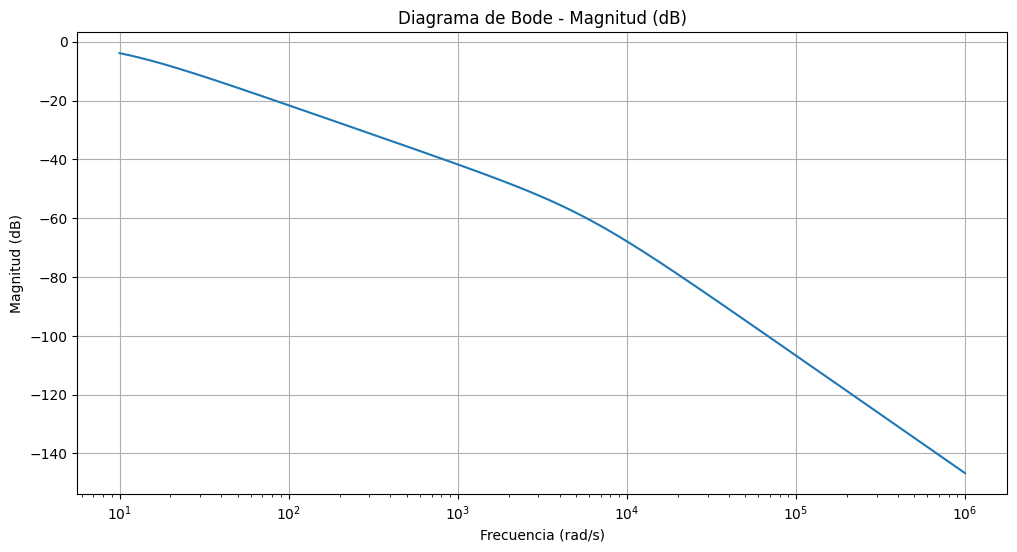

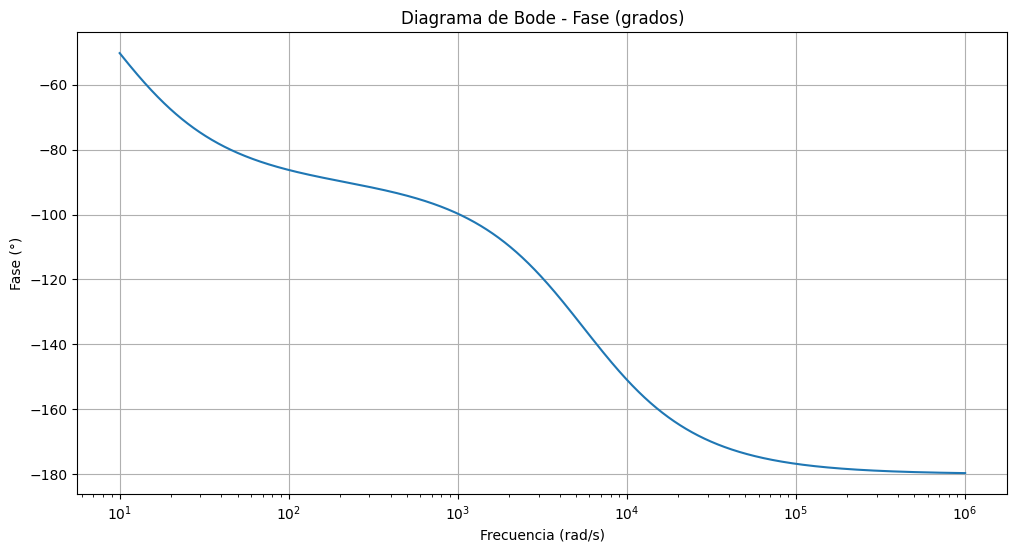

3) Polos y ceros del sistema

Ceros: []
Polos: [-5547.20968458    -8.34587097] 



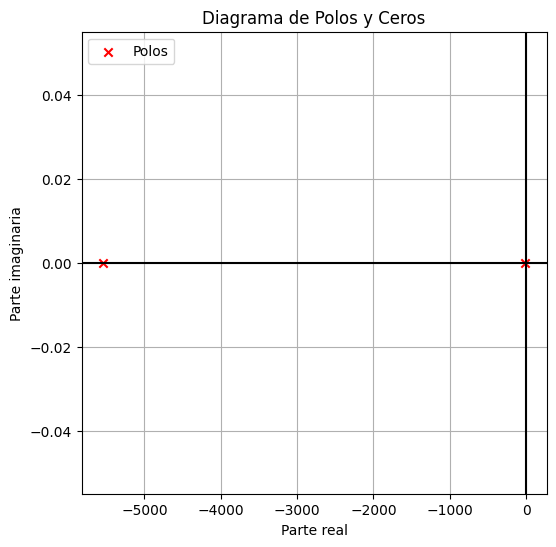

4) Respuesta al impulso h(t)



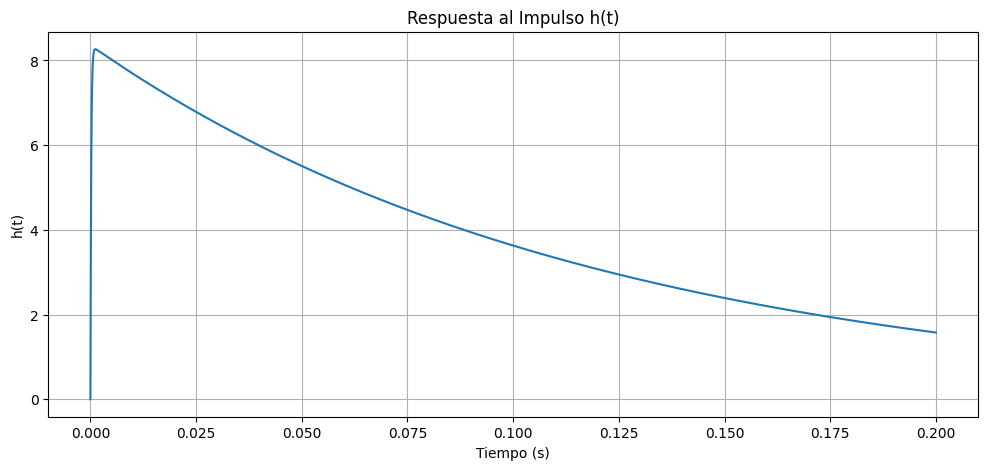

5) Respuesta a una entrada Vi(t) (ejemplo: escalón)



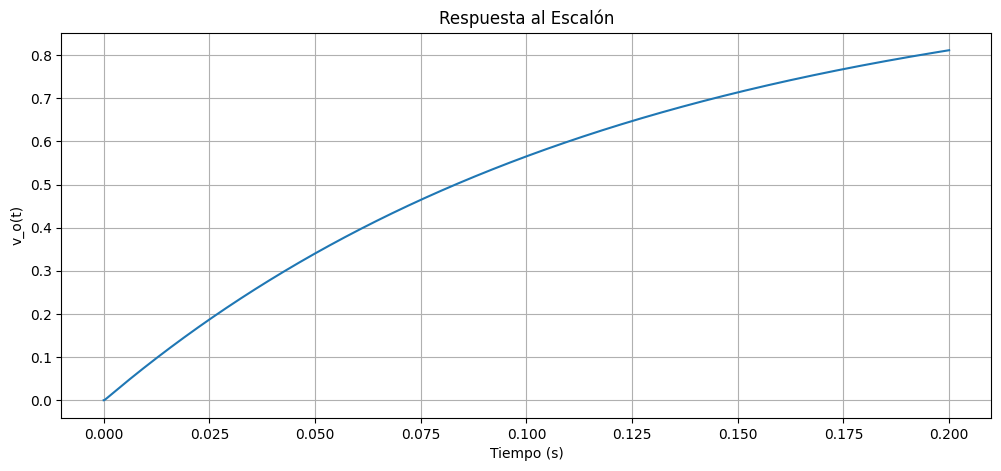

Análisis completo finalizado.


In [7]:
# ============================================================
#     ANÁLISIS COMPLETO DE CIRCUITO RLC EN SERIE (SALIDA EN C)
# ============================================================

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del circuito
R = 1000          # ohm
L = 0.18          # H
C = 120e-6        # F

# ============================================================
# 1. ECUACIÓN DIFERENCIAL
# ============================================================

print("1) Ecuación diferencial del circuito\n")

# EDO: L*C * v'' + R*C * v' + v = Vi(t)
LC = L*C
RC = R*C

print(f"EDO: {LC:.6e} * d²vo/dt²  +  {RC:.6e} * dvo/dt  +  vo(t)  =  Vi(t)")
print("\n")

# ============================================================
# 2. FUNCIÓN DE TRANSFERENCIA H(jw) Y DIAGRAMA DE BODE
# ============================================================

print("2) Función de transferencia H(s)\n")

# H(s) = 1 / (LC*s^2 + RC*s + 1)
num = [1]
den = [LC, RC, 1]
H = signal.TransferFunction(num, den)

print("H(s) = 1 / (LC*s² + RC*s + 1)")
print(f"        LC = {LC},   RC = {RC}")
print("\n")

# ----- Bode -----
w = np.logspace(1, 6, 2000)
w, mag, phase = signal.bode(H, w)

plt.figure(figsize=(12,6))
plt.semilogx(w, mag)
plt.title("Diagrama de Bode - Magnitud (dB)")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.semilogx(w, phase)
plt.title("Diagrama de Bode - Fase (grados)")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (°)")
plt.grid(True)
plt.show()


# ============================================================
# 3. DIAGRAMA DE POLOS Y CEROS
# ============================================================

print("3) Polos y ceros del sistema\n")

zeros = np.roots(num)
poles = np.roots(den)

print("Ceros:", zeros)
print("Polos:", poles, "\n")

plt.figure(figsize=(6,6))
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label="Polos")
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.title("Diagrama de Polos y Ceros")
plt.grid(True)
plt.legend()
plt.show()


# ============================================================
# 4. RESPUESTA IMPULSIVA h(t)
# ============================================================

print("4) Respuesta al impulso h(t)\n")

t = np.linspace(0, 0.2, 2000)
t_imp, h = signal.impulse(H, T=t)

plt.figure(figsize=(12,5))
plt.plot(t_imp, h)
plt.title("Respuesta al Impulso h(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("h(t)")
plt.grid(True)
plt.show()


# ============================================================
# 5. EJEMPLO: RESPUESTA A UNA SEÑAL DE ENTRADA
# ============================================================
# Puedes cambiar la entrada: escalón, seno, cuadrada, etc.

print("5) Respuesta a una entrada Vi(t) (ejemplo: escalón)\n")

t = np.linspace(0, 0.2, 2000)
t_step, y_step = signal.step(H, T=t)

plt.figure(figsize=(12,5))
plt.plot(t_step, y_step)
plt.title("Respuesta al Escalón")
plt.xlabel("Tiempo (s)")
plt.ylabel("v_o(t)")
plt.grid(True)
plt.show()

print("Análisis completo finalizado.")
